**PREPARACIÓN DEL NOTEBOOK**

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
#!pip install kneed
from kneed import KneeLocator

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FactorAnalysis

#!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer

## **NIVEL UNO**

In [92]:
df=pd.read_csv('https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_2da_entrega/main/dataset_final.csv')

**DATASET ORIGINAL**

### **ALGORITMO K-MEANS**

In [93]:
# Número optimo de K
inertia_list = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=3, n_init=10)
    kmeans.fit(df)
    inertia_list.append(kmeans.inertia_)

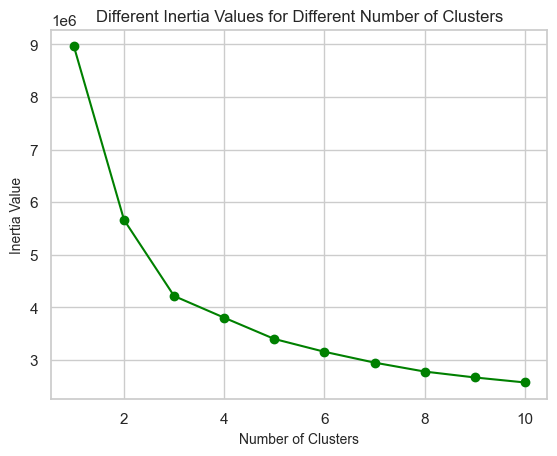

In [94]:
# plot the inertia curve
plt.plot(range(1,11),inertia_list, color='green', marker='o')
plt.scatter(range(1,11),inertia_list)
plt.xlabel("Number of Clusters", size=10)
plt.ylabel("Inertia Value", size=10)
plt.title("Different Inertia Values for Different Number of Clusters", size=12)
plt.show()

In [95]:
## La siguiente librería reafirma la decicion de la seleccion de "codos" efectuada visualmente del grafico anterior
# Seleccion automatica del numero k 
kl_1 = KneeLocator(range(1, 11),
                 inertia_list, curve="convex",
                 direction="decreasing")
kl_1.elbow

3

In [96]:
kmeans_constants = {"init": "random", "n_init": 100, "max_iter": 500, "random_state": 42}

# --- Modelo K-means ---
model_kmeans = KMeans(n_clusters = 3, **kmeans_constants)
model_kmeans.fit(df)

KMeans(init='random', max_iter=500, n_clusters=3, n_init=100, random_state=42)

**Evaluación del algoritmos**

**Calinski Harabasz Score:**

El índice Calinski-Harabasz se basa en la comparación de la relación ponderada entre la suma de los cuadrados (la medida de la separación del clúster) y la suma de los cuadrados dentro del clúster (la medida de cómo se empaquetan estrechamente los puntos dentro de un clúster).

Las soluciones de clúster con valores más grandes del índice corresponden a soluciones "mejores" que las soluciones de clúster con valores más pequeños.

In [97]:
# --- Evaluación del modelo kmeans ---
print(" ### K-MEANS ###")
print('Inertia: ', model_kmeans.inertia_)
print('Silhouette Score: ', silhouette_score(df, model_kmeans.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(df, model_kmeans.labels_))

 ### K-MEANS ###
Inertia:  4218161.141257673


Silhouette Score:  0.2952984873311604
Calinski harabasz score:  3511.4521799457143


**Lectura de anterior salida.**
- Se cuenta con una inercia alta
- Un indice de siluetas bajo, entre más cercano a 1 mejor. Este indice informa que tan bien esta echa la agrupación, quíza en este caso el dataset no sea tan suseptible a realizar agrupaciones.
- Indice de referencia de Calinski. Se usa para comparar con otro algoritmo.

In [98]:
## Para obtener la etiqueta que da el algoritmo
# Predicción de los clusters
Cluster_1 = model_kmeans.fit_predict(df)
Cluster_1

array([1, 2, 1, ..., 1, 0, 0])

In [99]:
# Vamos a adjuntar 'Cluster_1' como una nueva variable a 'df':
df_final = df.copy()
df_final['Cluster_1']= Cluster_1

# A partir de ahora, sólo trabajaremos con "df_final"
df_final.head()

,overall,age,height_cm,weight_kg,club_position,pace,shooting,passing,dribbling,defending,physic,defending1,attacking1,skills1,mentality1,movement1,power,Cluster_1
0,83,32,177,77,3,80.0,82.0,78.0,84.0,31.0,67.0,22.333333,78.6,65.666667,69.000000,81.4,73.0,1
1,83,32,190,86,1,67.0,55.0,64.0,59.0,85.0,78.0,84.333333,59.8,52.500000,63.833333,64.6,69.4,2
2,83,35,193,80,3,66.0,83.0,72.0,78.0,45.0,76.0,32.666667,77.0,60.666667,70.833333,65.6,77.6,1
3,83,31,178,77,1,66.0,55.0,76.0,72.0,84.0,76.0,84.666667,66.6,58.833333,74.833333,71.6,71.6,2
4,83,32,183,80,0,72.0,81.0,77.0,81.0,80.0,85.0,78.000000,78.4,64.333333,79.666667,76.6,85.6,2


In [100]:
# NOTA: Se debe asignar una etiqueta a cada categoria de 'Cluster_1' para saber que nos esta informando
# Corroborar las etiquetas que se tiene
df_final.Cluster_1.unique()

array([1, 2, 0])

## **NIVEL DOS**

### **APLICACIÓN DE PCA**

In [101]:
#Cree un dataset reducido que proporcione el 85% de la varianza de entrada que debe explicarse
pca = PCA(n_components=0.85).fit(df)

#Veamos cuántas componentes ha conservado PCA:
pca.n_components_

3

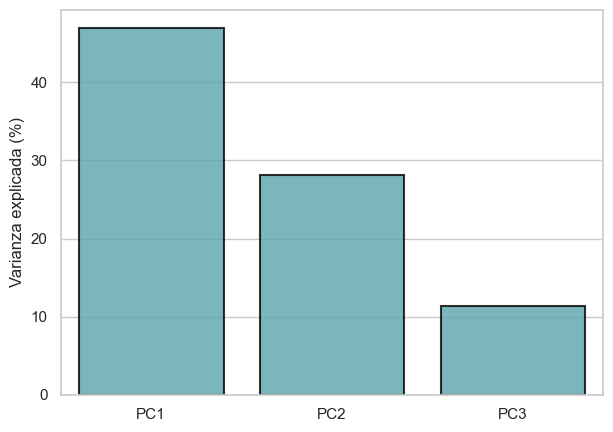

In [102]:
## Diagrama la varianza explicada para cada una de los 5 componentes
## Con este grafico se evalua como las componentes estan explicando las varianzas

# --- Varianza explicada --- 
PCA_variance_1 = pd.DataFrame({'Varianza explicada (%)':
                             pca.explained_variance_ratio_*100})

fig, ax = plt.subplots(1, 1, figsize = (7, 5))

bar = sns.barplot(x = ['PC' + str(i) for i in range(1, 4)],
                  y = PCA_variance_1['Varianza explicada (%)'],
                  linewidth = 1.5, edgecolor = 'k', color = '#4bafb8',
                  alpha = 0.8)

plt.show()

In [103]:
# Porsentaje de varianza explicada por cada componente
PCA_variance_1

,Varianza explicada (%)
0,46.944411
1,28.196402
2,11.362331


**Lectura del anterior gráfico y tabla.** 
- Entre la componente 'PC1' y 'PC2' se esta explicando aproximadamente el 73% de la varianza. 
- Si esta explicando un porsentaje significativo, puesto que para llegar a una varianza explicada del 75% se necesitan de pocas variable (3 en este caso). Este comportamiento se debe a que las variables del dataset son numericas.

In [104]:
#Por último, transforme "df" de 18 columnas X_pca
X_pca_1 = pca.fit_transform(df)
X_pca_1 #Dataset ya transformado

array([[ 60.8857691 ,  22.82989908,   4.62140937],
       [-35.54346435,  27.72357142,  11.20448388],
       [ 38.26089617,  24.18796071,  28.47184666],
       ...,
       [ 27.25048357, -57.80413408, -15.01742252],
       [ -0.91055596, -41.95233297,   1.42387317],
       [-13.91121805, -47.10303842,   5.55913758]])

**Interpretación.** No se tiene una lectura tan sencilla de las componentes, pero se puede identificar la influencia de las variables dentro de cada componente, esto es más interpretable en los graficos de los clustering.

### **ALGORITMO K-MEANS**

In [105]:
# Número optimo de K
inertia_list_1 = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=3, n_init=10)
    kmeans.fit(X_pca_1)
    inertia_list_1.append(kmeans.inertia_)

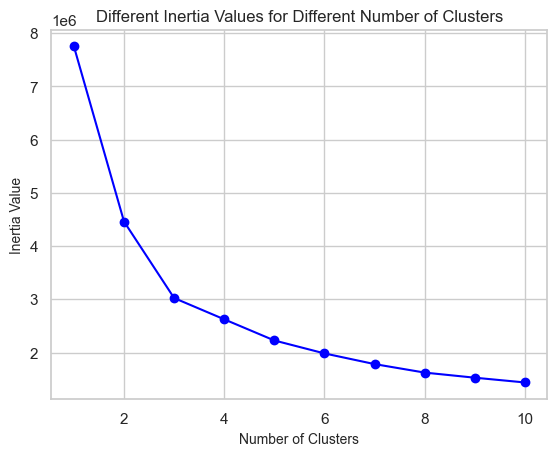

In [106]:
# plot the inertia curve
plt.plot(range(1,11),inertia_list_1, color='blue', marker='o')
plt.scatter(range(1,11),inertia_list_1)
plt.xlabel("Number of Clusters", size=10)
plt.ylabel("Inertia Value", size=10)
plt.title("Different Inertia Values for Different Number of Clusters", size=12)
plt.show()

In [107]:
## La siguiente librería reafirma la decicion de la seleccion de "codos" efectuada visualmente del grafico anterior
# Seleccion automatica del numero k 
kl_1 = KneeLocator(range(1, 11),
                 inertia_list_1, curve="convex",
                 direction="decreasing")
kl_1.elbow

3

In [108]:
kmeans_constants = {"init": "random", "n_init": 100, "max_iter": 500, "random_state": 42}

# --- Modelo K-means ---
model_kmeans = KMeans(n_clusters = 3, **kmeans_constants)
model_kmeans.fit(X_pca_1)

KMeans(init='random', max_iter=500, n_clusters=3, n_init=100, random_state=42)

**Evaluación del algoritmos**

**Calinski Harabasz Score:**

El índice Calinski-Harabasz se basa en la comparación de la relación ponderada entre la suma de los cuadrados (la medida de la separación del clúster) y la suma de los cuadrados dentro del clúster (la medida de cómo se empaquetan estrechamente los puntos dentro de un clúster).

Las soluciones de clúster con valores más grandes del índice corresponden a soluciones "mejores" que las soluciones de clúster con valores más pequeños.

In [109]:
# --- Evaluación del modelo kmeans ---
print(" ### K-MEANS ###")
print('Inertia: ', model_kmeans.inertia_)
print('Silhouette Score: ', silhouette_score(X_pca_1, model_kmeans.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(X_pca_1, model_kmeans.labels_))

 ### K-MEANS ###
Inertia:  3023652.298497271


Silhouette Score:  0.36524639699250255
Calinski harabasz score:  4883.444567366748


**Lectura de anterior salida.**
- Se cuenta con una inercia alta
- Un indice de siluetas bajo, entre más cercano a 1 mejor. Este indice informa que tan bien esta echa la agrupación, quíza en este caso el dataset no sea tan suseptible a realizar agrupaciones.
- Indice de referencia de Calinski. Se usa para comparar con otro algoritmo.

**CONCLUSIÓN HASTA EL MOMENTO** 

El algoritmo de kmeans si esta haciendo una buena agrupación, esto se debe quiza a la información del dataset

In [110]:
## Para obtener la etiqueta que da el algoritmo
# Predicción de los clusters
Cluster_2 = model_kmeans.fit_predict(df)
Cluster_2

array([1, 2, 1, ..., 1, 0, 0])

In [111]:
# Vamos a adjuntar 'Cluster_2' como una nueva variable a 'df':

df_final['Cluster_2'] = Cluster_2

# A partir de ahora, sólo trabajaremos con "df_final"
df_final.head()

,overall,age,height_cm,weight_kg,club_position,pace,shooting,passing,dribbling,defending,physic,defending1,attacking1,skills1,mentality1,movement1,power,Cluster_1,Cluster_2
0,83,32,177,77,3,80.0,82.0,78.0,84.0,31.0,67.0,22.333333,78.6,65.666667,69.000000,81.4,73.0,1,1
1,83,32,190,86,1,67.0,55.0,64.0,59.0,85.0,78.0,84.333333,59.8,52.500000,63.833333,64.6,69.4,2,2
2,83,35,193,80,3,66.0,83.0,72.0,78.0,45.0,76.0,32.666667,77.0,60.666667,70.833333,65.6,77.6,1,1
3,83,31,178,77,1,66.0,55.0,76.0,72.0,84.0,76.0,84.666667,66.6,58.833333,74.833333,71.6,71.6,2,2
4,83,32,183,80,0,72.0,81.0,77.0,81.0,80.0,85.0,78.000000,78.4,64.333333,79.666667,76.6,85.6,2,2


In [112]:
# NOTA: Se debe asignar una etiqueta a cada categoria de 'Cluster_2' para saber que nos esta informando
# Corroborar las etiquetas que se tiene
df_final.Cluster_2.unique()

array([1, 2, 0])

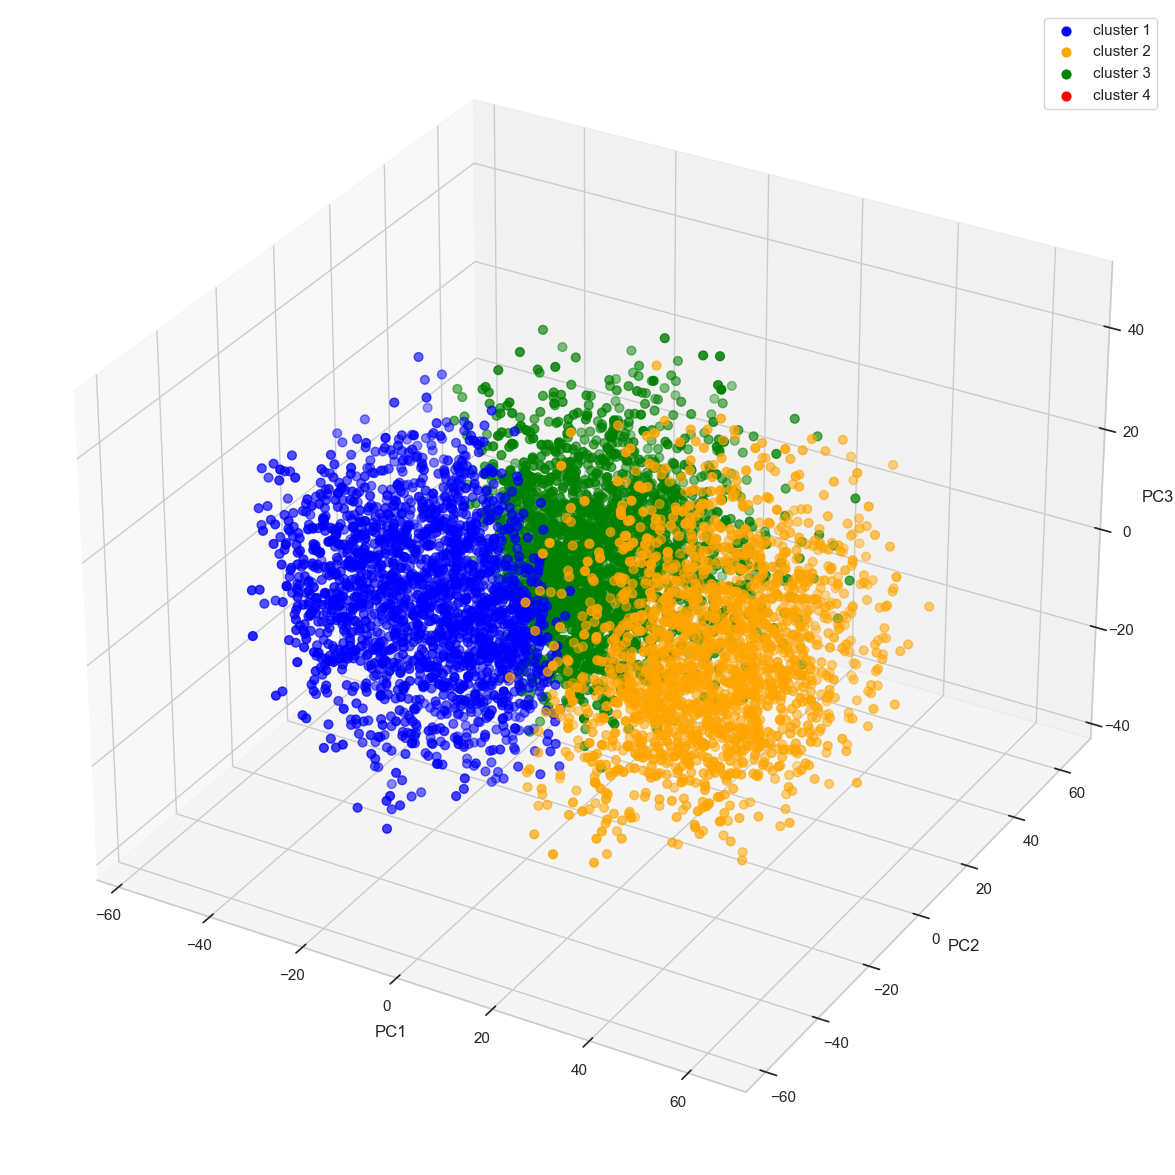

In [113]:
### Gráfico de dispersión respecto al 'cluster_2'
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_1[Cluster_2 == 0,0],X_pca_1[Cluster_2 == 0,1],X_pca_1[Cluster_2 == 0,2], s = 40 , color = 'blue', label = "cluster 1")
ax.scatter(X_pca_1[Cluster_2 == 1,0],X_pca_1[Cluster_2 == 1,1],X_pca_1[Cluster_2 == 1,2], s = 40 , color = 'orange', label = "cluster 2")
ax.scatter(X_pca_1[Cluster_2 == 2,0],X_pca_1[Cluster_2 == 2,1],X_pca_1[Cluster_2 == 2,2], s = 40 , color = 'green', label = "cluster 3")
ax.scatter(X_pca_1[Cluster_2 == 3,0],X_pca_1[Cluster_2 == 3,1],X_pca_1[Cluster_2 == 3,2], s = 40 , color = 'red', label = "cluster 4")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

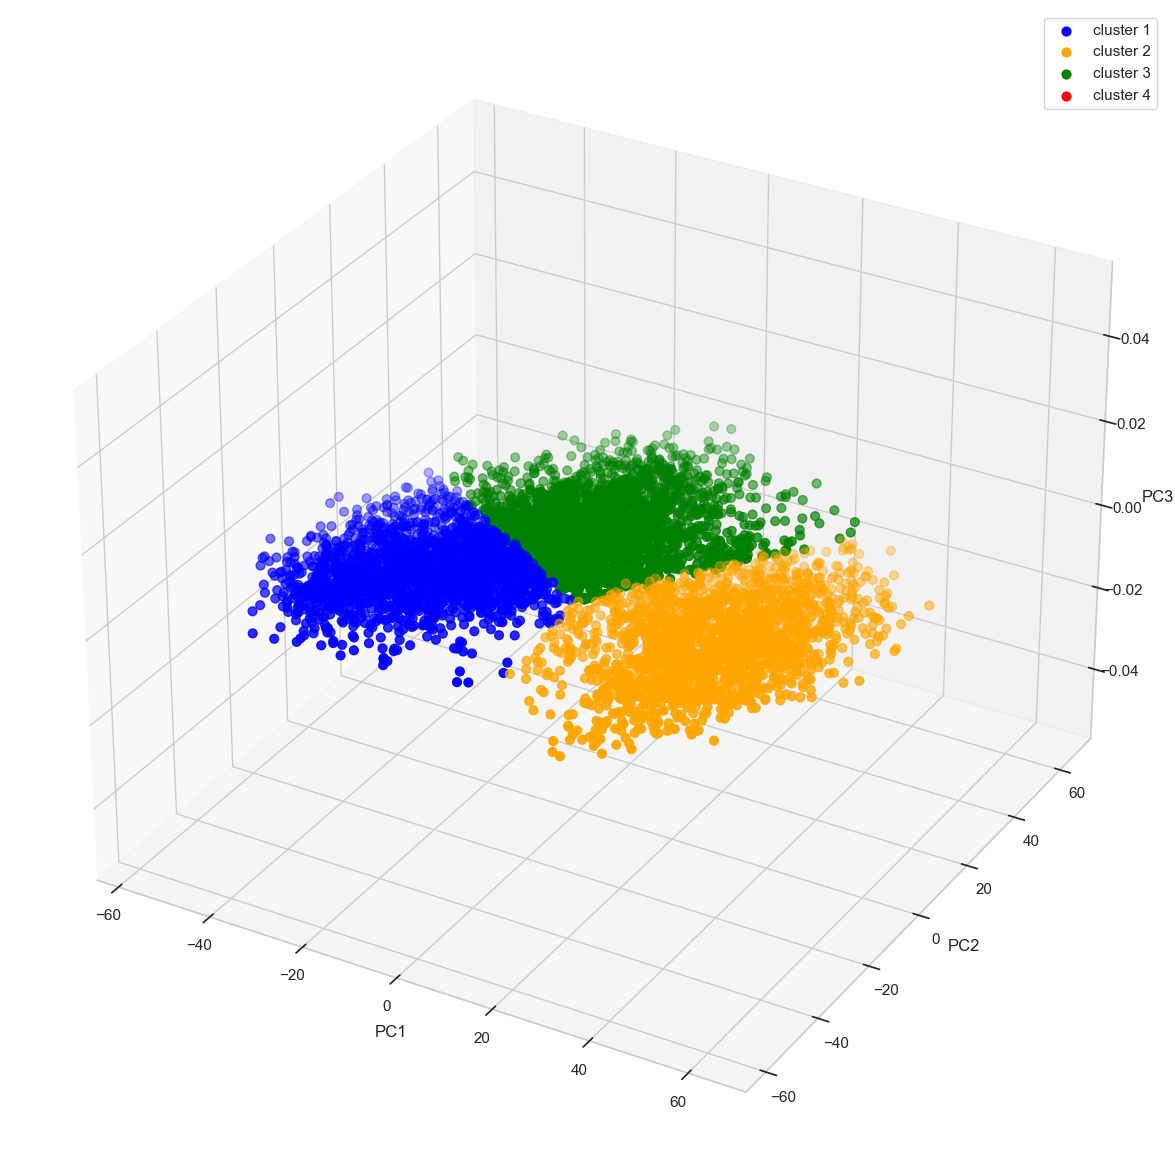

In [114]:
### Gráfico de dispersión respecto al 'cluster_2'
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_1[Cluster_2 == 0,0],X_pca_1[Cluster_2 == 0,1], s = 40 , color = 'blue', label = "cluster 1")
ax.scatter(X_pca_1[Cluster_2 == 1,0],X_pca_1[Cluster_2 == 1,1], s = 40 , color = 'orange', label = "cluster 2")
ax.scatter(X_pca_1[Cluster_2 == 2,0],X_pca_1[Cluster_2 == 2,1], s = 40 , color = 'green', label = "cluster 3")
ax.scatter(X_pca_1[Cluster_2 == 3,0],X_pca_1[Cluster_2 == 3,1], s = 40 , color = 'red', label = "cluster 4")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

## **NIVEL TRES**

### **ALGORITMO GaussianMixture**

Text(0.5, 0, 'Número de Clusters')

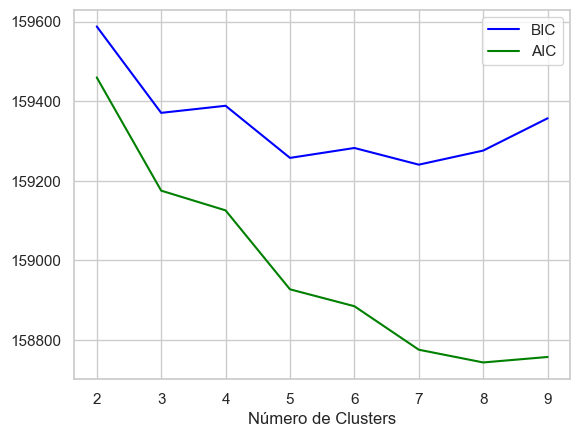

In [115]:
# --- Estimación de hiperparámetros ---

n_components = np.arange(2, 10)

models_g = [GaussianMixture(n_components=n, random_state=123).fit(X_pca_1) for n in n_components]

plt.plot(n_components, [m.bic(X_pca_1) for m in models_g], label="BIC", color="blue")
plt.plot(n_components, [m.aic(X_pca_1) for m in models_g], label="AIC", color="green")
plt.legend()
plt.xlabel("Número de Clusters")

In [116]:
# --- Modelo GMM ---
model_gmm = GaussianMixture(n_components=3, random_state=123, covariance_type = 'full').fit(X_pca_1)

In [117]:

# --- Evaluación del modelo GMM ---
labels_ = model_gmm.predict(X_pca_1)

print(" ### GaussianMixture ###")
print('Silhouette Score: ', silhouette_score(X_pca_1, labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(X_pca_1, labels_))

 ### GaussianMixture ###


Silhouette Score:  0.3552561376002395
Calinski harabasz score:  4706.089041865195


In [118]:
# Predicción de los clusters
Cluster_3 = model_gmm.fit_predict(X_pca_1)

df_final['Cluster_3']= Cluster_3

# A partir de ahora, sólo trabajaremos con "df_final"
df_final.head(3)

,overall,age,height_cm,weight_kg,club_position,pace,shooting,passing,dribbling,defending,physic,defending1,attacking1,skills1,mentality1,movement1,power,Cluster_1,Cluster_2,Cluster_3
0,83,32,177,77,3,80.0,82.0,78.0,84.0,31.0,67.0,22.333333,78.6,65.666667,69.000000,81.4,73.0,1,1,1
1,83,32,190,86,1,67.0,55.0,64.0,59.0,85.0,78.0,84.333333,59.8,52.500000,63.833333,64.6,69.4,2,2,2
2,83,35,193,80,3,66.0,83.0,72.0,78.0,45.0,76.0,32.666667,77.0,60.666667,70.833333,65.6,77.6,1,1,1


In [119]:
df_final['Cluster_3'].value_counts()

Cluster_3
2    2492
1    1927
0    1832
Name: count, dtype: int64

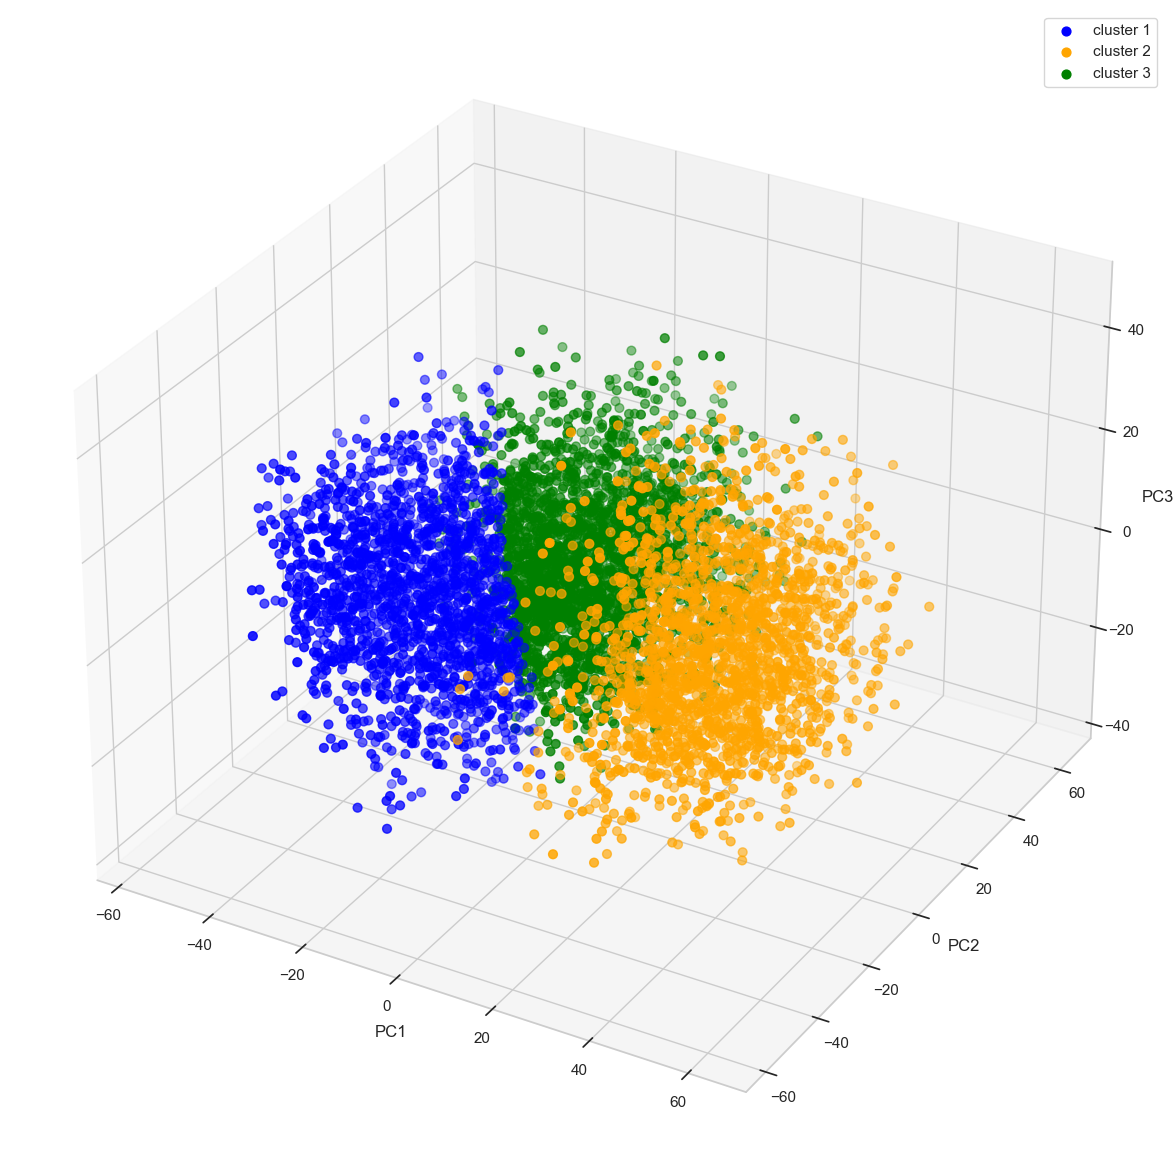

In [120]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_1[Cluster_3 == 0,0],X_pca_1[Cluster_3 == 0,1],X_pca_1[Cluster_3 == 0,2], s = 40 , color = 'blue', label = "cluster 1")
ax.scatter(X_pca_1[Cluster_3 == 1,0],X_pca_1[Cluster_3 == 1,1],X_pca_1[Cluster_3 == 1,2], s = 40 , color = 'orange', label = "cluster 2")
ax.scatter(X_pca_1[Cluster_3 == 2,0],X_pca_1[Cluster_3 == 2,1],X_pca_1[Cluster_3 == 2,2], s = 40 , color = 'green', label = "cluster 3")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

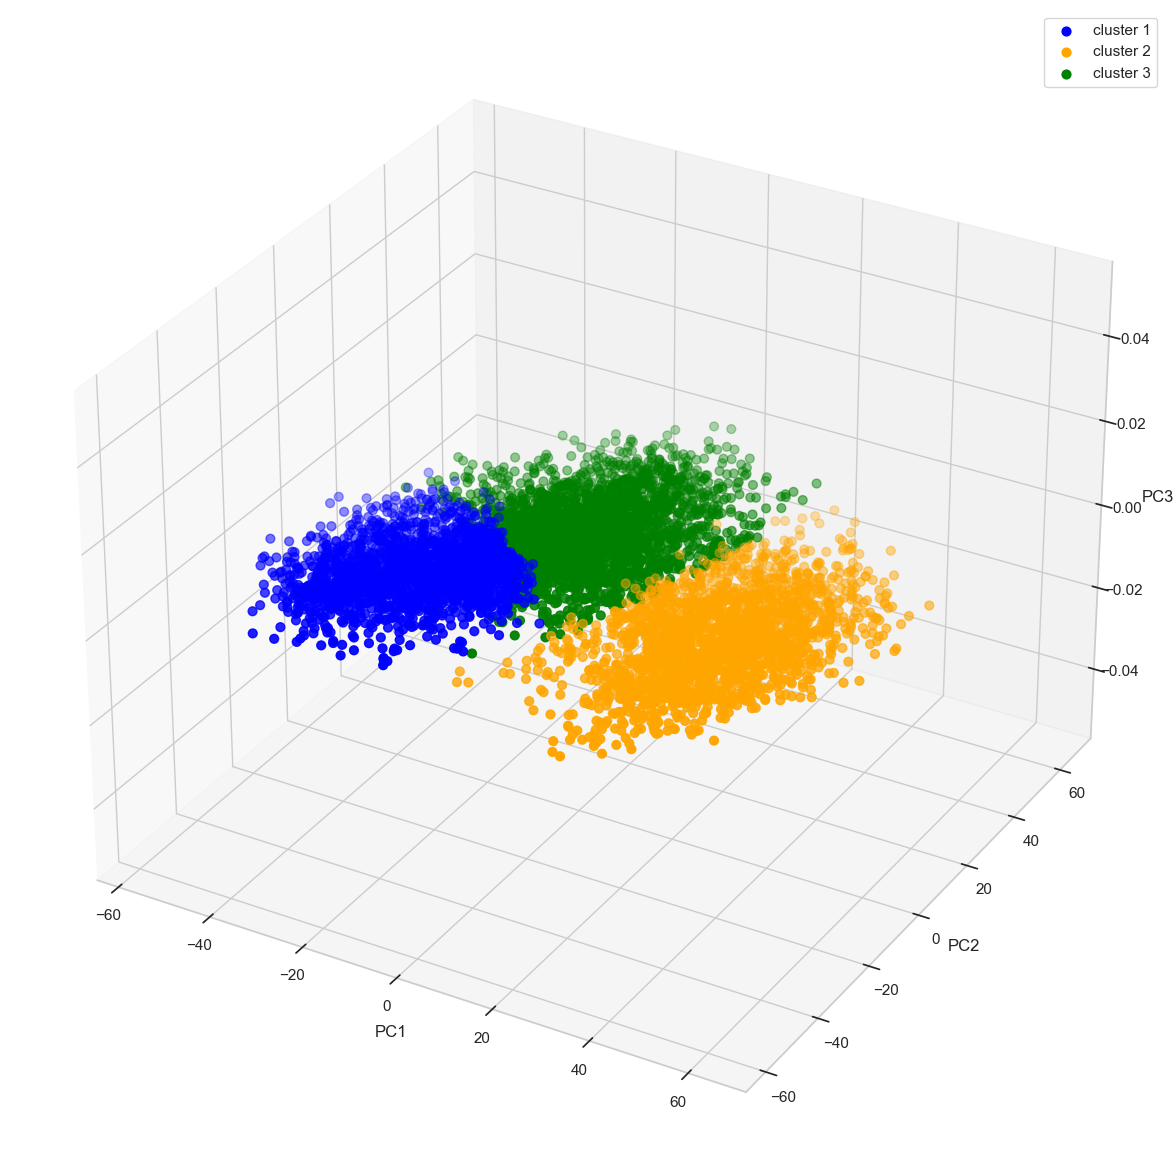

In [121]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_1[Cluster_3 == 0,0],X_pca_1[Cluster_3 == 0,1], s = 40 , color = 'blue', label = "cluster 1")
ax.scatter(X_pca_1[Cluster_3 == 1,0],X_pca_1[Cluster_3 == 1,1], s = 40 , color = 'orange', label = "cluster 2")
ax.scatter(X_pca_1[Cluster_3 == 2,0],X_pca_1[Cluster_3 == 2,1], s = 40 , color = 'green', label = "cluster 3")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()